In [125]:
from icecream import ic
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [127]:
#Helper functions

def new_solution():
    # Start with empty knapsacks (-1 means item not picked, 0 means knapsack 0, 1 means knapsack 1, etc.)
    return np.full(NUM_ITEMS, -1, dtype=int)

def feasibility_check(solution):
    for k in range(NUM_KNAPSACKS):
        items=np.where(solution == k)[0] # Indices of items in knapsack k
        total_weights = np.sum(WEIGHTS[items], axis=0) if len(items) > 0 else np.zeros(NUM_DIMENSIONS) # Total weights in each dimension if knapsack has items
        if np.any(total_weights > CONSTRAINTS[k]):
            return False
    return True

def fitness(solution):
    if not feasibility_check(solution):
        return -1
    picked_items=(solution>=0) # Boolean array of picked items in any knapsack
    return np.sum(VALUES[picked_items]) # Total value of picked items

def tweak(solution):
    new_solution = solution.copy()
    item = np.random.randint(0, NUM_ITEMS) # Randomly select an item    
    choices = np.arange(-1, NUM_KNAPSACKS) # Possible choices for the item (-1 means not picked)
    choices = choices[choices != new_solution[item]] # Remove current state of item
    new_solution[item] = np.random.choice(choices) # Assign a new random state to the item
    return new_solution


In [144]:
def random_mutation_hill_climber(max_steps):
    #max_steps = 20000
    current_solution = new_solution()
    current_fitness = fitness(current_solution)
    best_solution = current_solution
    best_fitness = current_fitness
    fitness_progress = [best_fitness]

    for step in tqdm(range(max_steps)):
        neighbor = tweak(current_solution)
        neighbor_fitness = fitness(neighbor)

        if neighbor_fitness > current_fitness:
            current_solution = neighbor 
            current_fitness = neighbor_fitness

            if current_fitness > best_fitness:
                best_solution = current_solution
                best_fitness = current_fitness

        fitness_progress.append(best_fitness)


    # Print results
    print("Best fitness value:", best_fitness)
    print("Feasible:", feasibility_check(best_solution))

    # Plot progress
    plt.figure(figsize=(10, 5))
    plt.plot(np.maximum.accumulate(fitness_progress), label="Best so far", color="red")
    plt.scatter(range(len(fitness_progress)), fitness_progress, s=4, alpha=0.3, label="Current")
    plt.xlabel("Iteration")
    plt.ylabel("Fitness")
    plt.title("Random Mutation Hill Climber Progress")
    plt.legend()
    plt.show()

TEST PROBLEMS

100%|██████████| 2000/2000 [00:00<00:00, 24774.17it/s]

Best fitness value: 1056
Feasible: True


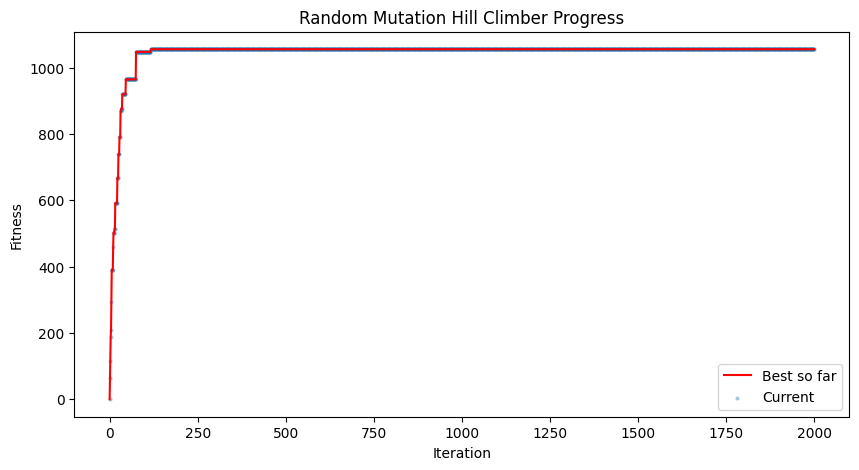

In [145]:
# Problem 1:
rng = np.random.default_rng(seed=42)
NUM_KNAPSACKS = 3
NUM_ITEMS = 20
NUM_DIMENSIONS = 2
VALUES = rng.integers(0, 100, size=NUM_ITEMS)
WEIGHTS = rng.integers(0, 100, size=(NUM_ITEMS, NUM_DIMENSIONS))
CONSTRAINTS = rng.integers(
    0, 100 * NUM_ITEMS // NUM_KNAPSACKS, size=(NUM_KNAPSACKS, NUM_DIMENSIONS)
)

random_mutation_hill_climber(max_steps=2000)


100%|██████████| 10000/10000 [00:00<00:00, 24873.94it/s]


Best fitness value: 35051
Feasible: True


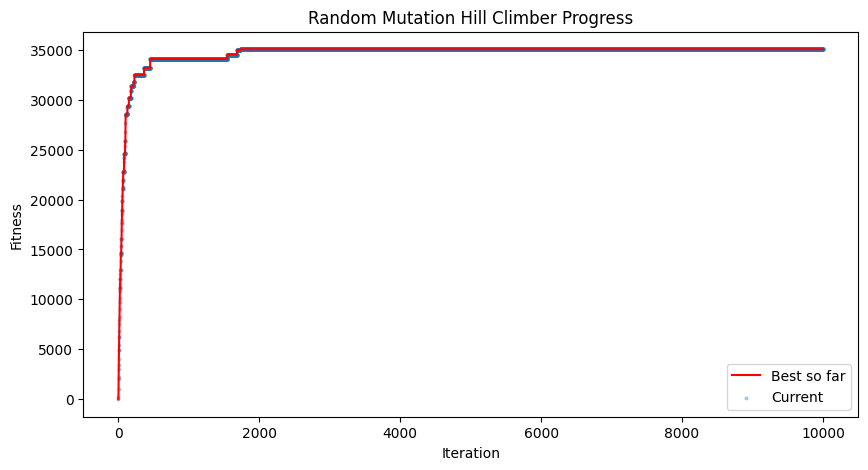

In [148]:
# Problem 2:
rng = np.random.default_rng(seed=42)
NUM_KNAPSACKS = 10
NUM_ITEMS = 100
NUM_DIMENSIONS = 10
VALUES = rng.integers(0, 1000, size=NUM_ITEMS)
WEIGHTS = rng.integers(0, 1000, size=(NUM_ITEMS, NUM_DIMENSIONS))
CONSTRAINTS = rng.integers(
    1000 * 2, 1000 * NUM_ITEMS // NUM_KNAPSACKS, size=(NUM_KNAPSACKS, NUM_DIMENSIONS)
)

random_mutation_hill_climber(max_steps=10000)

100%|██████████| 20000/20000 [00:15<00:00, 1315.34it/s]


Best fitness value: 1130805
Feasible: True


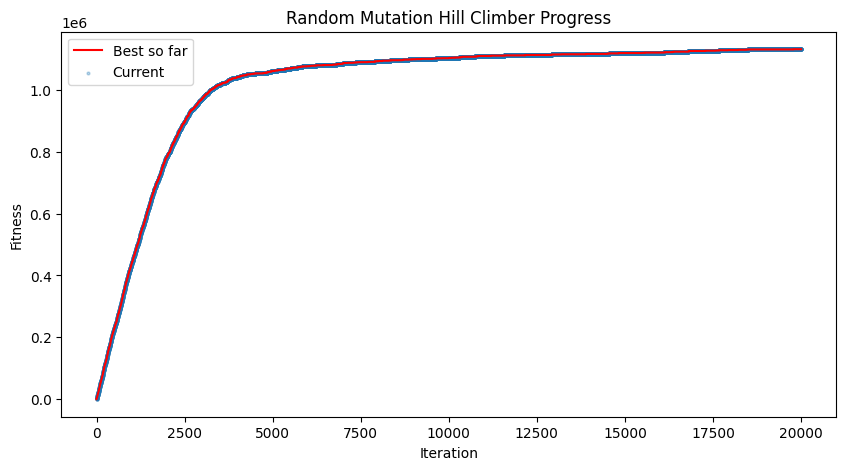

In [149]:
# Problem 3:
rng = np.random.default_rng(seed=42)
NUM_KNAPSACKS = 100
NUM_ITEMS = 5000
NUM_DIMENSIONS = 100
VALUES = rng.integers(0, 1000, size=NUM_ITEMS)
WEIGHTS = rng.integers(0, 1000, size=(NUM_ITEMS, NUM_DIMENSIONS))
CONSTRAINTS = rng.integers(
    1000 * 10, 1000 * 2 * NUM_ITEMS // NUM_KNAPSACKS, size=(NUM_KNAPSACKS, NUM_DIMENSIONS)
)

random_mutation_hill_climber(max_steps=20000)